In [ ]:
from time import time
import numpy as np
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt
%matplotlib inline
from keras import regularizers
import tensorflow as tf
import keras

In [ ]:
# check tensorflow version, we want the one that support eager mode
tf.__version__

'2.4.1'

## **DATASET**
Load CIFAR10 dataset and split the training set into train and validation set

In [ ]:
from tensorflow.keras.datasets import cifar10

(x_train_full, y_train_full), (x_test, y_test) = cifar10.load_data()
print('x_train_full shape: {}, y_train_full.shape: {}'
      .format(x_train_full.shape, y_train_full.shape))
print('x_test shape: {}, y_test.shape: {}'.format(x_test.shape, y_test.shape))

170500096/170498071 [==============================] - 3s 0us/step
x_train_full shape: (50000, 32, 32, 3), y_train_full.shape: (50000, 1)
x_test shape: (10000, 32, 32, 3), y_test.shape: (10000, 1)


In [ ]:
y_train_full = y_train_full.reshape(y_train_full.shape[0],)
y_test = y_test.reshape(y_test.shape[0],)
print('y_train_full shape: {}, y_test shape: {}'
      .format(y_train_full.shape, y_test.shape))

y_train_full shape: (50000,), y_test shape: (10000,)


In [ ]:
# create validation set
split = 0.2
x_train, x_val, y_train, y_val = train_test_split(
    x_train_full, y_train_full, test_size=0.2, random_state=42)
print('x_train: {}, y_train: {}, x_val: {}, y_val: {}'
      .format(x_train.shape, y_train.shape, x_val.shape, y_val.shape))

x_train: (40000, 32, 32, 3), y_train: (40000,), x_val: (10000, 32, 32, 3), y_val: (10000,)


In [ ]:
# pick 25 random images and plot
idxs = np.random.randint(x_train.shape[0], size=25)
images = x_train[idxs]
labels = y_train[idxs]
classnames = ['airplane', 'automobile', 'bird', 'cat', 'deer', 'dog', 'frog', 'horse', 'ship', 'truck']

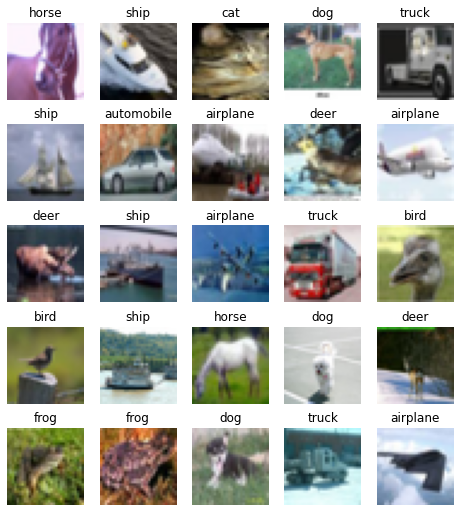

In [ ]:
fig, axes = plt.subplots(5,5, figsize=(8,9))
for i, ax in enumerate(axes.flat):
  ax.imshow(images[i])
  ax.axis('off')
  idx = labels[i]
  ax.set_title(classnames[idx])
  
plt.show()

We have the dataset loaded and split into training, validation and test sets, now we can move on to data augmentation

# **DATA PREPROCESSING**

In [ ]:
x_train[1,:,:,:].shape # a shape of 1 image is (32,32,3)

(32, 32, 3)

In [ ]:
# We should normalize the data
def prep_pixels(train, validation, test):
  train_norm = train.astype('float32')
  test_norm = test.astype('float32')
  valid_norm = validation.astype('float32')

  train_norm = train_norm / 255
  test_norm = test_norm / 255
  valid_norm = valid_norm / 255

  return train_norm, valid_norm, test_norm


In [ ]:
train_norm, valid_norm, test_norm = prep_pixels(x_train,x_val,x_test) # y_train, y_val, y_test - corresponding labels

In [ ]:
train_datagen = tf.keras.preprocessing.image.ImageDataGenerator(rescale=1/255,width_shift_range=0.1,height_shift_range=0.1,horizontal_flip=True,rotation_range=15,brightness_range=(0.9,1.1))

In [ ]:
#train_datagen = tf.keras.preprocessing.image.ImageDataGenerator(rescale=1/255)

In [ ]:
train_datagen.fit(x_train)

# **MODEL BUILDING**

In [ ]:
width_factor=1
weight_decay = 1e-4
model = tf.keras.models.Sequential()

model.add(tf.keras.layers.Conv2D(32*width_factor, (3,3), padding='same', kernel_regularizer=regularizers.l2(weight_decay), input_shape=(32,32,3)))
model.add(tf.keras.layers.Activation('relu'))
model.add(tf.keras.layers.BatchNormalization())
model.add(tf.keras.layers.Conv2D(32*width_factor, (3,3), padding='same', kernel_regularizer=regularizers.l2(weight_decay)))
model.add(tf.keras.layers.Activation('relu'))
model.add(tf.keras.layers.BatchNormalization())
model.add(tf.keras.layers.MaxPooling2D(pool_size=(2,2)))
model.add(tf.keras.layers.Dropout(0.3))

model.add(tf.keras.layers.Conv2D(64*width_factor, (3,3), padding='same', kernel_regularizer=regularizers.l2(weight_decay)))
model.add(tf.keras.layers.Activation('relu'))
model.add(tf.keras.layers.BatchNormalization())
model.add(tf.keras.layers.Conv2D(64*width_factor, (3,3), padding='same', kernel_regularizer=regularizers.l2(weight_decay)))
model.add(tf.keras.layers.Activation('relu'))
model.add(tf.keras.layers.BatchNormalization())
model.add(tf.keras.layers.MaxPooling2D(pool_size=(2,2)))
model.add(tf.keras.layers.Dropout(0.3))

model.add(tf.keras.layers.Conv2D(128*width_factor, (3,3), padding='same', kernel_regularizer=regularizers.l2(weight_decay)))
model.add(tf.keras.layers.Activation('relu'))
model.add(tf.keras.layers.BatchNormalization())
model.add(tf.keras.layers.Conv2D(128*width_factor, (3,3), padding='same', kernel_regularizer=regularizers.l2(weight_decay)))
model.add(tf.keras.layers.Activation('relu'))
model.add(tf.keras.layers.BatchNormalization())
model.add(tf.keras.layers.MaxPooling2D(pool_size=(2,2)))
model.add(tf.keras.layers.Dropout(0.3))

model.add(tf.keras.layers.Conv2D(256*width_factor, (3,3), padding='same', kernel_regularizer=regularizers.l2(weight_decay)))
model.add(tf.keras.layers.Activation('relu'))
model.add(tf.keras.layers.BatchNormalization())
model.add(tf.keras.layers.Conv2D(256*width_factor, (3,3), padding='same', kernel_regularizer=regularizers.l2(weight_decay)))
model.add(tf.keras.layers.Activation('relu'))
model.add(tf.keras.layers.BatchNormalization())
model.add(tf.keras.layers.MaxPooling2D(pool_size=(2,2)))
model.add(tf.keras.layers.Dropout(0.3))

model.add(tf.keras.layers.Conv2D(512*width_factor, (3,3), padding='same', kernel_regularizer=regularizers.l2(weight_decay)))
model.add(tf.keras.layers.Activation('relu'))
model.add(tf.keras.layers.BatchNormalization())
model.add(tf.keras.layers.Conv2D(512*width_factor, (3,3), padding='same', kernel_regularizer=regularizers.l2(weight_decay)))
model.add(tf.keras.layers.Activation('relu'))
model.add(tf.keras.layers.BatchNormalization())
model.add(tf.keras.layers.MaxPooling2D(pool_size=(2,2)))
model.add(tf.keras.layers.Dropout(0.3))

model.add(tf.keras.layers.Flatten())
model.add(tf.keras.layers.Dense(512*width_factor, activation='relu'))
model.add(tf.keras.layers.Dropout(0.3))
model.add(tf.keras.layers.Dense(10, activation='softmax'))

# **MODEL TRAINING**

In [ ]:
model.compile(
    optimizer=keras.optimizers.Adam(lr=0.001),
    loss="sparse_categorical_crossentropy",
    metrics=[keras.metrics.SparseCategoricalAccuracy(name="acc")],
)

In [ ]:
#start=time()
#history = model.fit(train_norm, y_train, epochs=25, batch_size=64, validation_data=(valid_norm, y_val))
#end=time()

In [ ]:
start=time()
history=model.fit(train_datagen.flow(x_train, y_train, batch_size=64, seed=123),
          steps_per_epoch=len(x_train) / 64, epochs=100, validation_data=(valid_norm, y_val))
end=time()

Epoch 1/100
625/625 [==============================] - 33s 50ms/step - loss: 2.2722 - acc: 0.2863 - val_loss: 2.2275 - val_acc: 0.3859
Epoch 2/100
625/625 [==============================] - 31s 50ms/step - loss: 1.5899 - acc: 0.4988 - val_loss: 1.9148 - val_acc: 0.4523
Epoch 3/100
625/625 [==============================] - 31s 49ms/step - loss: 1.3881 - acc: 0.5777 - val_loss: 1.2281 - val_acc: 0.6258
Epoch 4/100
625/625 [==============================] - 31s 49ms/step - loss: 1.2586 - acc: 0.6304 - val_loss: 1.2589 - val_acc: 0.6391
Epoch 5/100
625/625 [==============================] - 31s 49ms/step - loss: 1.1761 - acc: 0.6693 - val_loss: 1.1213 - val_acc: 0.6937
Epoch 6/100
625/625 [==============================] - 31s 49ms/step - loss: 1.1237 - acc: 0.6965 - val_loss: 1.0454 - val_acc: 0.7184
Epoch 7/100
625/625 [==============================] - 30s 49ms/step - loss: 1.0962 - acc: 0.7109 - val_loss: 1.0699 - val_acc: 0.7174
Epoch 8/100
625/625 [==============================] - 

In [ ]:
print((end-start)//60)

51.0


In [ ]:
acc = model.evaluate(test_norm, y_test)

313/313 [==============================] - 1s 5ms/step - loss: 0.7735 - acc: 0.8450


In [ ]:
acc

[0.7734846472740173, 0.8450000286102295]

In [ ]:
def plot(losses, accuracies, subplot_title,y_type):
    fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(14,4),sharey=True)
  
    ax1.plot(losses)
    ax1.set_xlabel('Epochs')
    ax1.set_ylabel(y_type)
    
    ax1.set_title(subplot_title[0])
  
    ax2.plot(accuracies)
    ax2.set_xlabel('Epochs')
    ax2.set_ylabel(y_type)
    ax2.set_title(subplot_title[1])
    
    plt.show()

# Training
plot(history.history['loss'], 
     history.history['val_loss'], 
     subplot_title=['Training Loss', 'Validation Loss'],y_type="Loss"
    )

# Validation
plot(history.history['acc'], 
     history.history['val_acc'], 
     subplot_title=['Training Accuracy', 'Validation Accuracy'],y_type="Accuracy"
    )

# Save Results

In [ ]:
model_type="block5_width1_reg_full"

In [ ]:
model.save("model_"+model_type)

INFO:tensorflow:Assets written to: model_block5_width1_reg_full/assets


In [ ]:
import shutil
shutil.make_archive("model_"+model_type, 'zip', "model_"+model_type)


'/content/model_block5_width1_reg_full.zip'

In [ ]:
import pandas as pd
# convert the history.history dict to a pandas DataFrame:     
hist_df = pd.DataFrame(history.history) 

# or save to csv: 
hist_csv_file = 'history_'+model_type+'.csv'
with open(hist_csv_file, mode='w') as f:
    hist_df.to_csv(f)

In [ ]:
!cd model && 7z e my_model.zip


7-Zip [64] 16.02 : Copyright (c) 1999-2016 Igor Pavlov : 2016-05-21
p7zip Version 16.02 (locale=en_US.UTF-8,Utf16=on,HugeFiles=on,64 bits,2 CPUs Intel(R) Xeon(R) CPU @ 2.20GHz (406F0),ASM,AES-NI)

Scanning the drive for archives:
  0M Scan         1 file, 13606652 bytes (13 MiB)

Extracting archive: my_model_from_blog3.zip
--
Path = my_model_from_blog3.zip
Type = zip
Physical Size = 13606652

  0%    Everything is Ok

Folders: 2
Files: 3
Size:       15144896
Compressed: 13606652


In [ ]:
imported = tf.keras.models.load_model("./model",compile=False)

NameError: ignored

In [ ]:
import pandas as pd
history=pd.read_csv("history_block4_width1_reg_full.csv")

In [ ]:
history

,Unnamed: 0,loss,acc,val_loss,val_acc
0,0,1.809833,0.377100,1.647701,0.4637
1,1,1.447416,0.518225,1.778496,0.4748
2,2,1.272276,0.594225,1.645283,0.5070
3,3,1.153909,0.642425,1.405160,0.5907
4,4,1.084366,0.674500,1.000453,0.7100
...,...,...,...,...,...
95,95,0.711713,0.854350,0.672832,0.8656
96,96,0.712774,0.852775,0.700914,0.8610
97,97,0.716448,0.852425,0.743351,0.8478
98,98,0.717543,0.851550,0.686415,0.8621


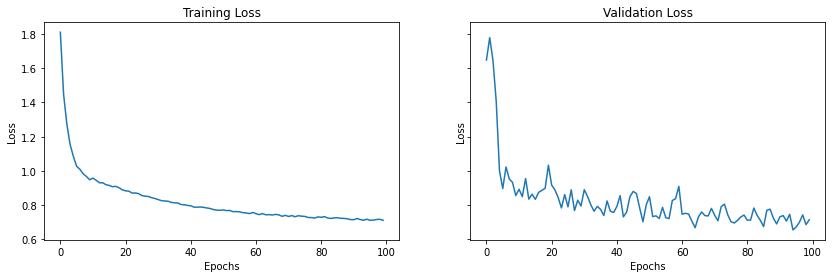

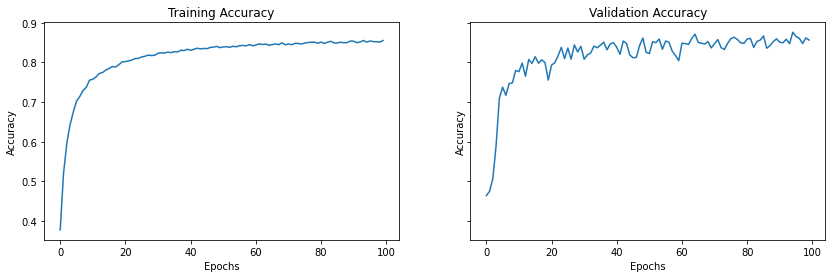

In [ ]:
# Training
plot(history['loss'], 
     history['val_loss'], 
     subplot_title=['Training Loss', 'Validation Loss'],y_type="Loss"
    )

# Validation
plot(history['acc'], 
     history['val_acc'], 
     subplot_title=['Training Accuracy', 'Validation Accuracy'],y_type="Accuracy"
    )